In [1]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,MeanShift,SpectralClustering

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 读取数据
data = pd.read_csv("./auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
# 随机查看5个数据
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
74,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)
257,19.4,6,232.0,90,3210,17.2,78,1,amc concord
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
184,25.0,4,140.0,92,2572,14.9,76,1,capri ii
63,14.0,8,400.0,175,4385,12.0,72,1,pontiac catalina


In [7]:
data.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [10]:
temp = data.horsepower.value_counts()
temp.index

Index(['150', '90', '88', '110', '100', '75', '95', '105', '70', '67', '65',
       '97', '85', '80', '145', '140', '92', '68', '78', '84', '?', '72',
       '180', '71', '86', '115', '130', '60', '170', '175', '83', '120', '76',
       '165', '52', '190', '125', '215', '48', '63', '112', '225', '96', '69',
       '74', '129', '98', '198', '53', '81', '79', '153', '58', '62', '87',
       '46', '160', '155', '139', '66', '149', '132', '64', '116', '77', '89',
       '142', '135', '138', '133', '103', '107', '108', '102', '220', '113',
       '200', '210', '193', '54', '208', '137', '158', '167', '94', '230',
       '49', '91', '122', '61', '93', '148', '152', '82'],
      dtype='object')

In [11]:
# 查看 ? 的值有多少个，发现有 6个 与398 个样本相比，可以直接去掉
temp[temp.index=="?"]

?    6
Name: horsepower, dtype: int64

In [12]:
# 删除与聚类无关的特征
data_auto = data.drop(['car name','origin','model year'],axis=1)

In [13]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.8+ KB


In [14]:
# 查看horsepower的值为 ? 的数据情况
print(data_auto[data_auto["horsepower"]=="?"])

      mpg  cylinders  displacement horsepower  weight  acceleration
32   25.0          4          98.0          ?    2046          19.0
126  21.0          6         200.0          ?    2875          17.0
330  40.9          4          85.0          ?    1835          17.3
336  23.6          4         140.0          ?    2905          14.3
354  34.5          4         100.0          ?    2320          15.8
374  23.0          4         151.0          ?    3035          20.5


In [15]:
# 查看horsepower的值为 ? 的索引，下面利用索引来删除这些数据
print(data_auto[data_auto['horsepower']=="?"].index)

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')


In [16]:
data_auto.drop(data_auto[data_auto['horsepower']=="?"].index,inplace=True)

In [18]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 21.4+ KB


# 标准化

In [19]:
# 实例化对象 StandardScaler ，z分数标准化
model_sc = StandardScaler()

In [20]:
# 训练拟合，计算均值和方差
model_sc.fit(data_auto)

StandardScaler()

In [21]:
# 查看均值
model_sc.mean_

array([  23.44591837,    5.47193878,  194.4119898 ,  104.46938776,
       2977.58418367,   15.54132653])

In [23]:
# 查看方差
model_sc.var_

array([6.07627384e+01, 2.90227379e+00, 1.09224329e+04, 1.47778988e+03,
       7.19644187e+05, 7.59191457e+00])

In [24]:
# 标准化
data_auto_sc = model_sc.transform(data_auto)

In [27]:
# 转化为二维表格
data_sc = pd.DataFrame(data_auto_sc,columns=data_auto.columns)

In [28]:
data_sc.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.840931e-16,-1.699321e-16,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.853218e+00,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.269250e-01,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-8.927701e-02,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.125143e-01,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.970359e+00,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [29]:
data_sc.info()
# 上面查看 horsepower 的数据类型是 object 类型,但是我们前面处理的时候,将?这个非数字类型的行去除
# 在进行标准化的时候,自动将全部是数字的数据类型转化为可以加减操作的 float 类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
dtypes: float64(6)
memory usage: 18.5 KB


# KMeans

In [30]:
# 聚类
# 实例化模型,训练模型
model_km  = KMeans(n_clusters=4,random_state=10)
model_km.fit(data_auto)

KMeans(n_clusters=4, random_state=10)

In [31]:
# 查看聚类结果，样本标签
model_km.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3, 3, 3, 1, 1, 3, 3,
       1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 3, 3, 3, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 1, 2, 2, 2, 2, 3, 1, 1, 1,
       1, 1, 3, 1, 2, 2, 1, 1, 3, 3, 0, 3, 3, 0, 3, 3, 0, 1, 3, 1, 3, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 3, 0, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 0, 3,
       3, 3, 3, 1, 3, 1, 3, 1, 1, 2, 2, 2, 2, 0, 0, 3, 3, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 3, 0, 2, 0, 3, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2,
       1, 3, 1, 1, 3, 3, 3, 1, 3, 0, 3, 0, 1, 1, 0, 3, 3, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 1, 1, 1, 3, 0, 0, 0, 0, 1, 1,

In [32]:
# 查看聚类结果，类的中心
model_km.cluster_centers_

array([[1.83528090e+01, 6.64044944e+00, 2.59966292e+02, 1.16808989e+02,
        3.48448315e+03, 1.56752809e+01],
       [3.07367647e+01, 3.97794118e+00, 9.81286765e+01, 7.29485294e+01,
        2.10770588e+03, 1.66014706e+01],
       [1.39913043e+01, 8.00000000e+00, 3.56536232e+02, 1.65130435e+02,
        4.36659420e+03, 1.30420290e+01],
       [2.46102041e+01, 4.70408163e+00, 1.54346939e+02, 9.42959184e+01,
        2.74643878e+03, 1.57081633e+01]])

In [33]:
# 逆标准化聚类中心
data_km = pd.DataFrame(model_sc.inverse_transform(model_km.cluster_centers_),
                      columns=data_auto.columns)

In [34]:
data_km

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,166.506904,16.784649,27363.604653,4594.844355,2.958929e+06,58.732101
1,263.040406,12.248784,10449.883555,2908.759142,1.790983e+06,61.284071
2,132.508776,19.100788,37456.171951,6452.418964,3.707240e+06,51.476589
3,215.283585,13.485841,16325.279119,3729.396166,2.332832e+06,58.822703


In [35]:
auto_label = model_km.labels_

In [36]:
# 聚类结果放置到原数据的最后一列
data_auto["label"] = auto_label

In [37]:
data_auto.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,label
361,25.4,6,168.0,116,2900,12.6,3
171,24.0,4,134.0,96,2702,13.5,3
139,14.0,8,302.0,140,4638,16.0,2
348,37.7,4,89.0,62,2050,17.3,1
134,16.0,6,258.0,110,3632,18.0,0


In [38]:
# 计算各类别的数量，保存到lbs
lbs = pd.Series(auto_label).value_counts()

In [39]:
lbs

1    136
3     98
0     89
2     69
dtype: int64

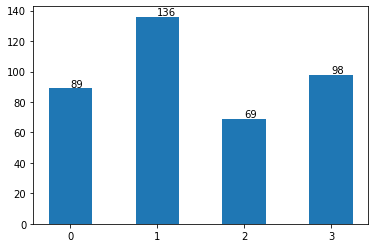

In [51]:
# 可视化
plt.bar(x= lbs.index,height=lbs,width=0.5)
plt.xticks([0,1,2,3])
for x,y in enumerate([89,136,69,98]):
    plt.text(x,y+1,y)